# Finding Donors for _CharityML_: Supervised Learning Project

Kaggle data set: https://www.kaggle.com/datasets/nancyalaswad90/finding-donors-for-charityml

In this project, we aim to test several supervised algorithms to effectively model individuals' income using data collected from the 1994 U.S. Census. Our primary objective is to construct a model that accurately predicts whether an individual earns more than $50,000.

This task holds relevance in non-profit settings, where organizations rely on donations. Understanding an individual's income can aid non-profits in determining the appropriate donation amount to request or whether to initiate outreach efforts. While directly determining an individual's income bracket from public sources can be challenging, we can infer this value from other publicly available features.

This data set is taken from Harvard Dataset- Innovations for Poverty Action Dataverse ([Dataset](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910/DVN/RDHJQZ)). Adjustments made to the original dataset for this project include removing the 'fnlwgt' feature and eliminating records with missing or improperly formatted entries.

## 1 - Exploration Data Analysis

Let's kick things off by importing the required libraries, reading in the data, and taking a peek at the dataset.

It's worth noting that the last column in this dataset, 'income', will serve as our target label, indicating whether an individual earns more than or at most $50,000 annually. All other columns represent features about each individual in the census database.

In [46]:
# Import numpy for numerical computing
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import time module from Python Standard Library to track how long pieces of code take to run
from time import time

# Import display from IPython.display to allow the use of display() for pretty printing of dataframes
from IPython.display import display

# Import seaborn for statistical data visualization
import seaborn as sns

# Import matplotlib.pyplot for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
%matplotlib inline

In [47]:
# Load the Census dataset using pandas' read_csv function
file = './data/census.csv'
df = pd.read_csv(file)

# Display the first record of the loaded dataset
# The head function returns the first n rows, in this case, n=1
display(df.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


In [48]:
# Let's see unique values for each column
for column in df.columns:
    print(column, df[column].unique())

age [39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]
workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
education_level [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
education-num [13.  9.  7. 14.  5. 10. 12.  4. 16. 11. 15.  3.  6.  1.  8.  2.]
marital-status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Arm

In [49]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


Certainly, let's proceed with the investigation of the dataset:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


We can see there are no missing values.

In [51]:
# Calculate the total number of records by getting the length of the data
total_records = len(df)

# Calculate the number of records where the individual's income is more than $50,000
# This is done by filtering the data where the 'income' column is '>50K' and getting the length of the result
individuals_earning_more_than_50k = len(df[df['income'] == '>50K'])

# Calculate the number of records where the individual's income is at most $50,000
# This is done by filtering the data where the 'income' column is '<=50K' and getting the length of the result
individuals_earning_at_most_50k = len(df[df['income'] == '<=50K'])

# Calculate the percentage of individuals whose income is more than $50,000
# This is done by dividing the number of individuals earning more than $50,000 by the total number of records and multiplying by 100
percentage_earning_more_than_50k = 100 * individuals_earning_more_than_50k / total_records

# Print the results
print(f"Total number of records: {total_records}")
print(f"Individuals making more than $50,000: {individuals_earning_more_than_50k}")
print(f"Individuals making at most $50,000: {individuals_earning_at_most_50k}")
print(f"Percentage of individuals making more than $50,000: {percentage_earning_more_than_50k:.2f}%")

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


Let's break down the counts of people earning above or below $50K based on their sex and education levels and other features. This will provide insights into how income levels vary across different demographic groups.

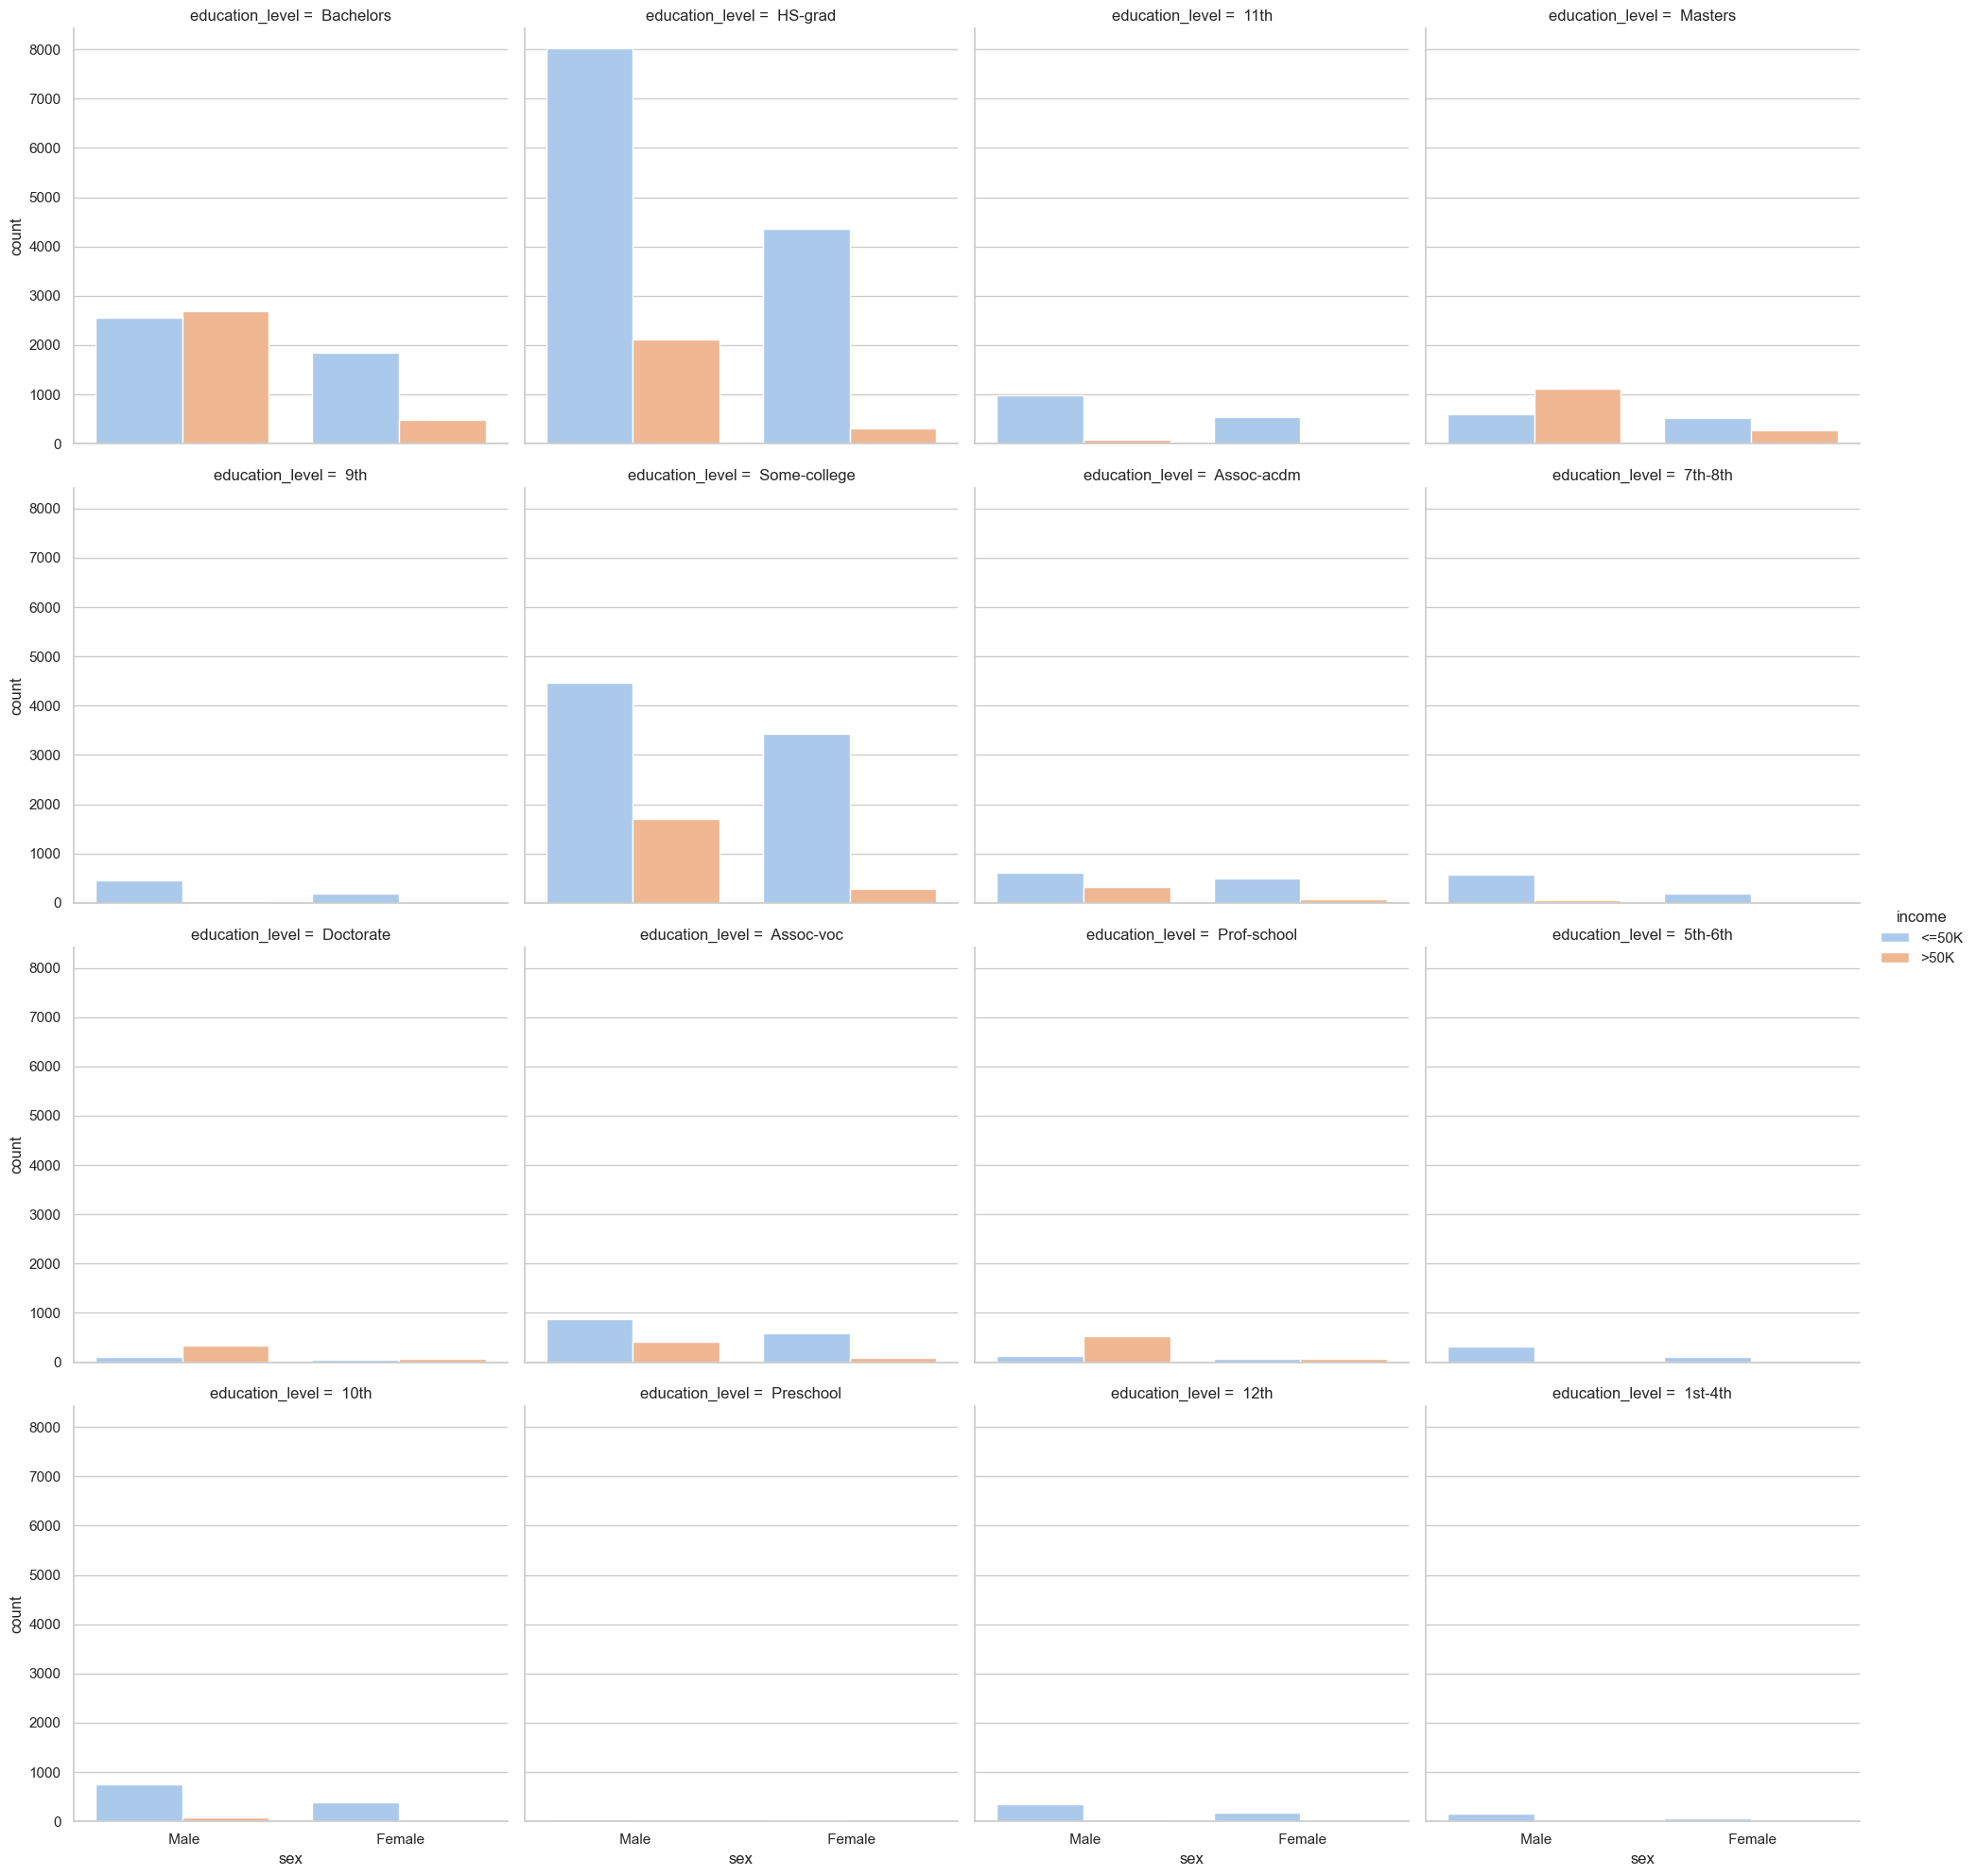

In [23]:
# Set plot style
sns.set(style="whitegrid", color_codes=True)

# Create a categorical plot
sns.catplot(x="sex", col='education_level', data=df, hue='income', kind="count", col_wrap=4, palette='pastel')

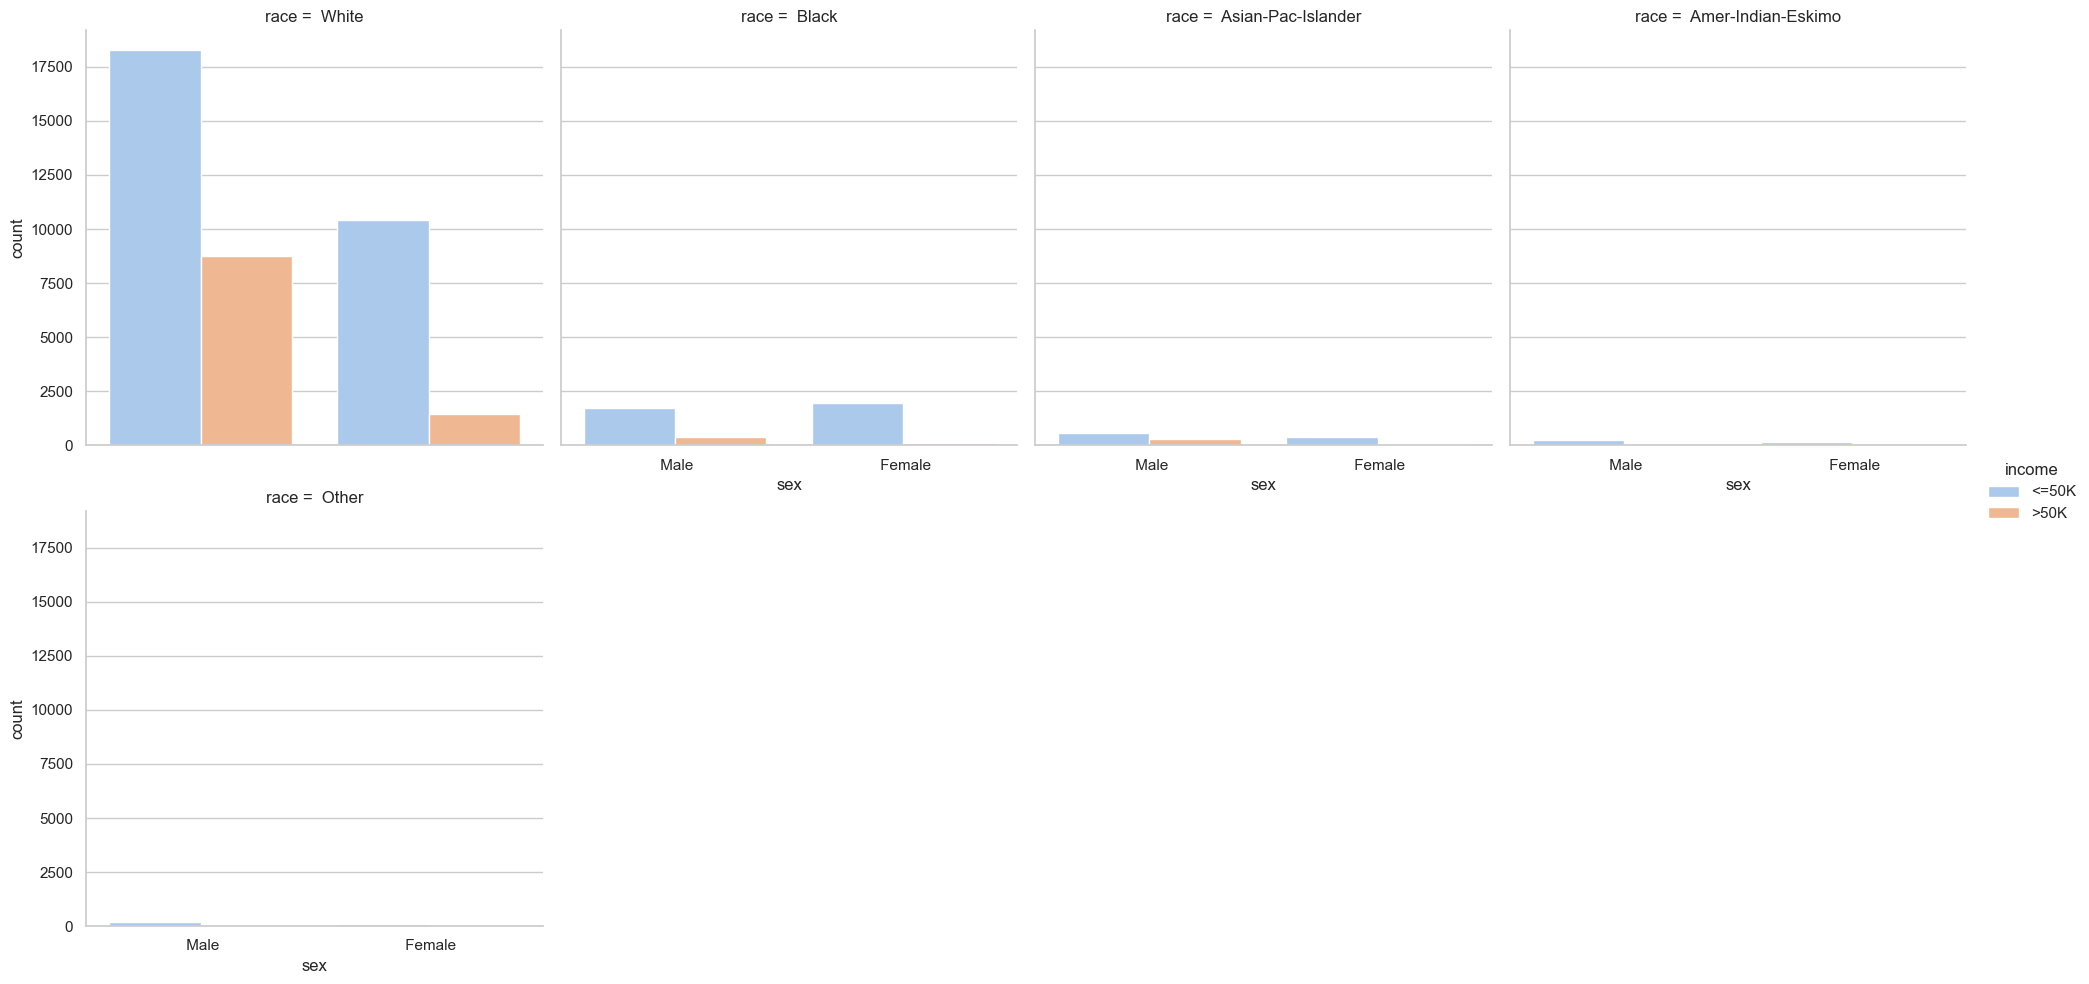

In [29]:
# Set plot style
sns.set(style="whitegrid", color_codes=True)

# Create a categorical plot
sns.catplot(x="sex", col='race', data=df, hue='income', kind="count", col_wrap=4, palette='pastel')

From the above plots we can see that it is much less common for women to earn more than 50k.

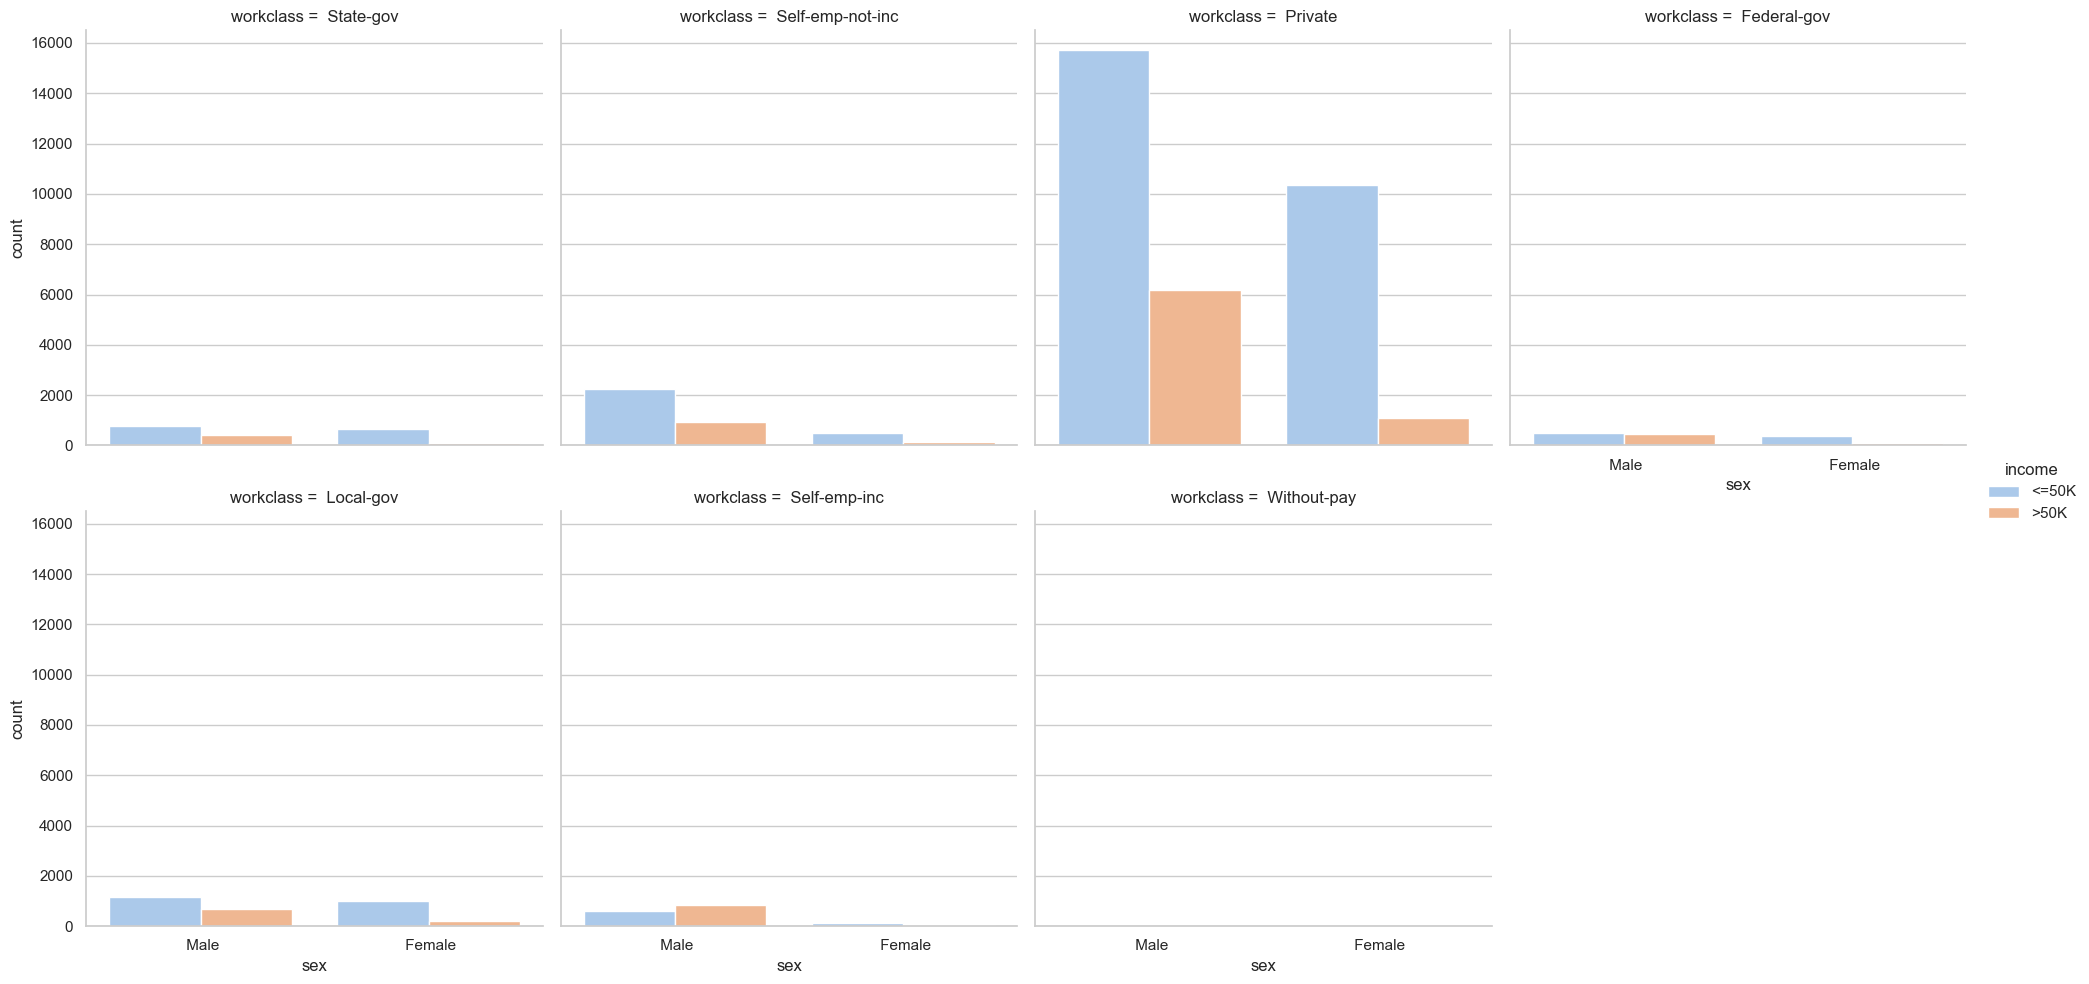

In [30]:
# Set plot style
sns.set(style="whitegrid", color_codes=True)

# Create a categorical plot
sns.catplot(x="sex", col='workclass', data=df, hue='income', kind="count", col_wrap=4, palette='pastel')

Here, we observe that nearly all individuals earning more than $50k in governmental positions are males.

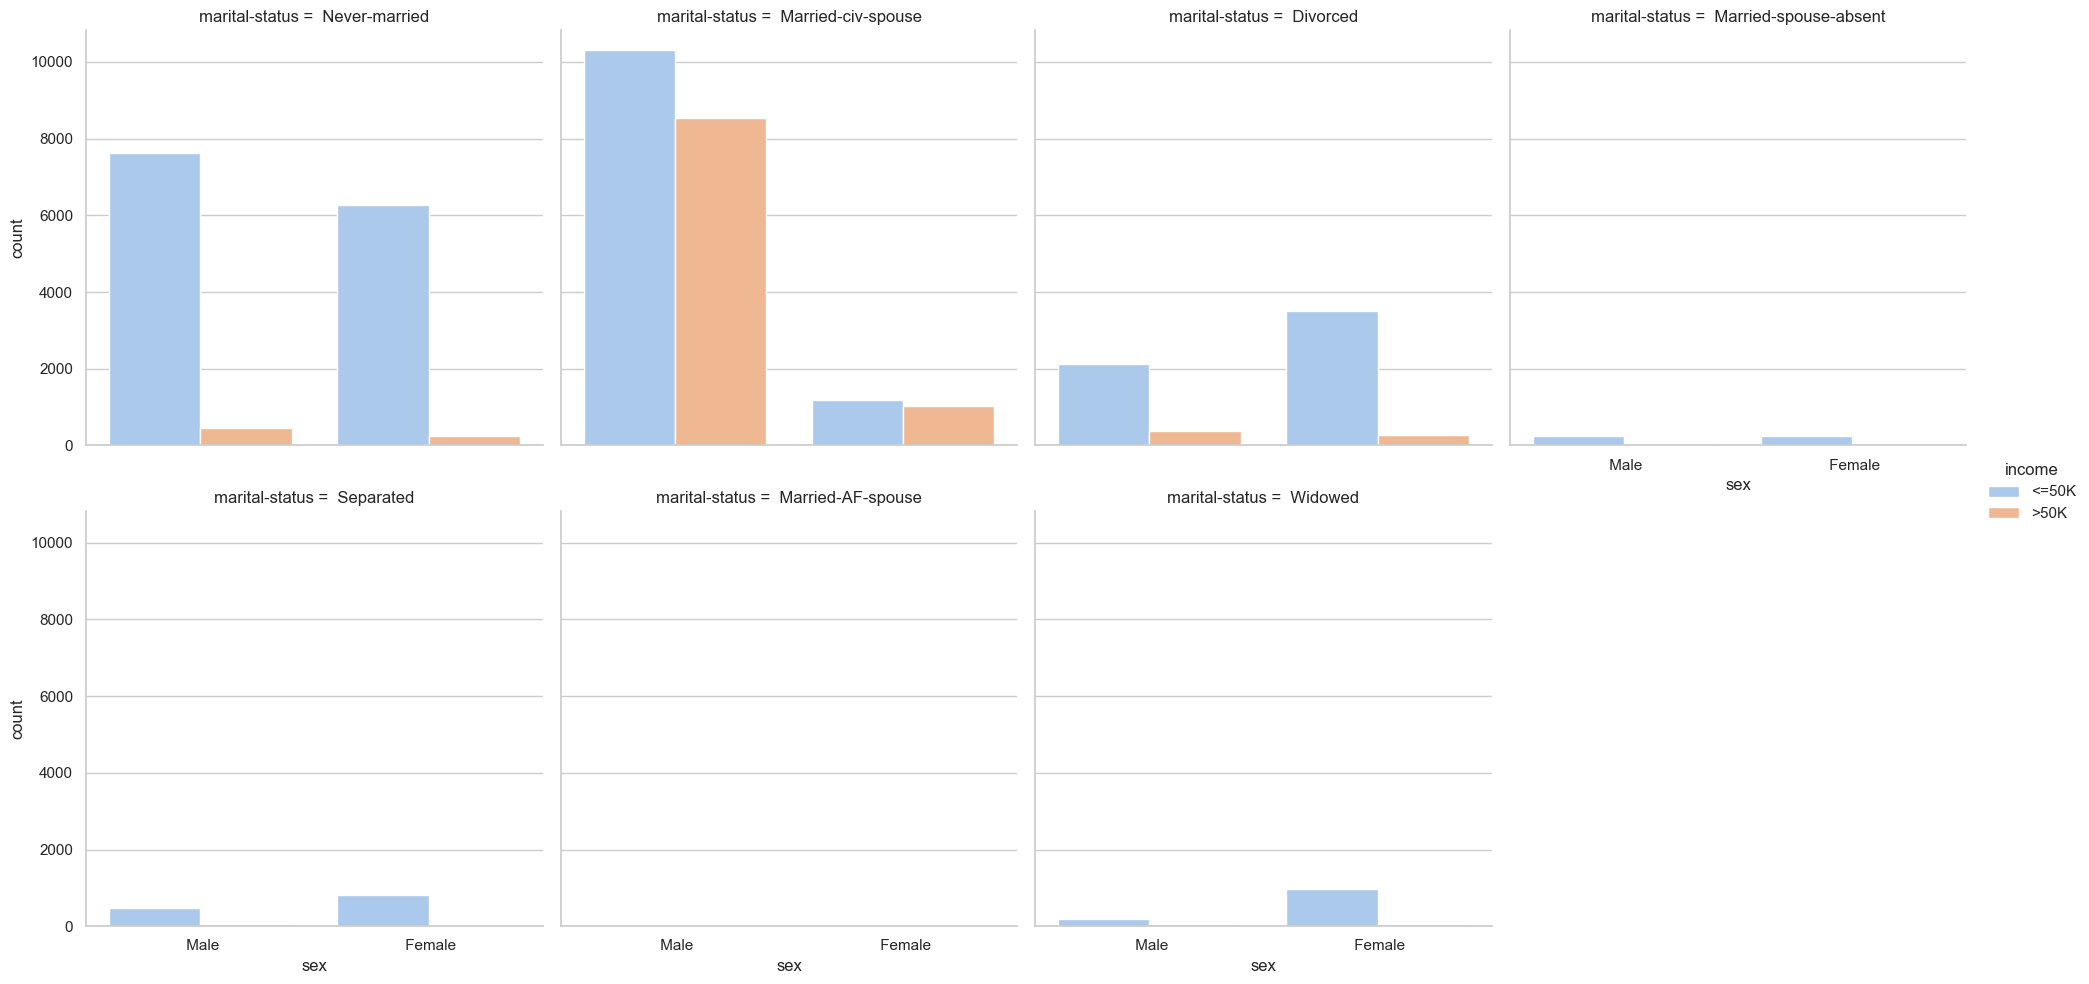

In [31]:
# Set plot style
sns.set(style="whitegrid", color_codes=True)

# Create a categorical plot
sns.catplot(x="sex", col='marital-status', data=df, hue='income', kind="count", col_wrap=4, palette='pastel')

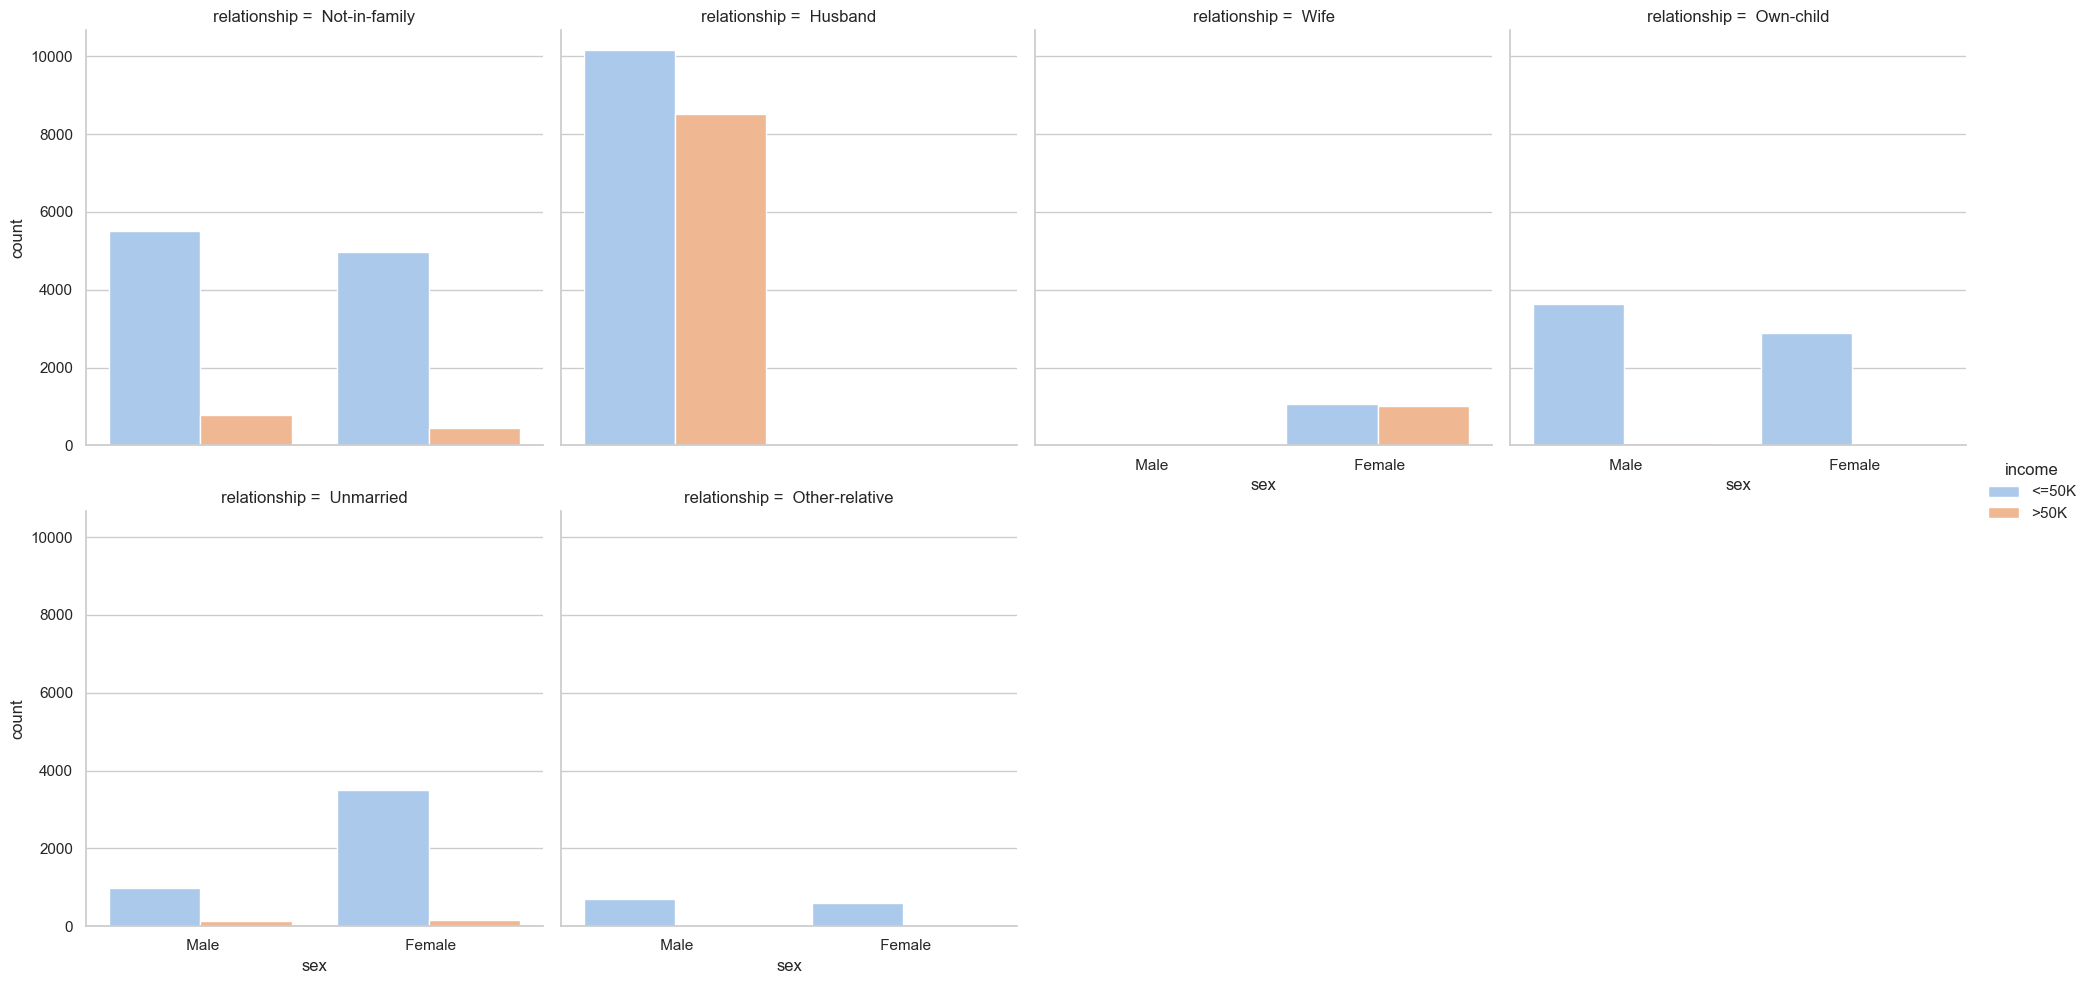

In [32]:
# Set plot style
sns.set(style="whitegrid", color_codes=True)

# Create a categorical plot
sns.catplot(x="sex", col='relationship', data=df, hue='income', kind="count", col_wrap=4, palette='pastel')

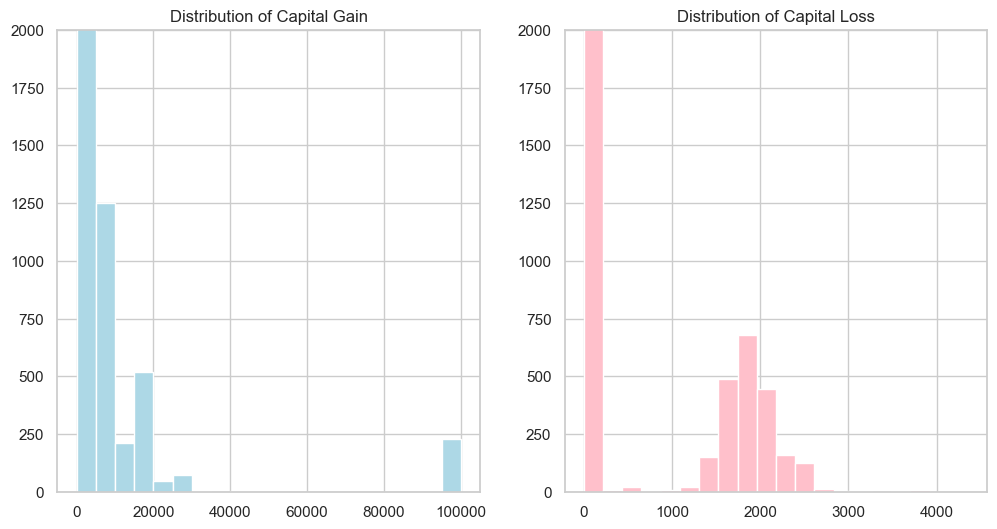

In [63]:
# Let's visualize the distribution of these two features (capital-gain and capital-loss) by plotting histograms
# Set the width and height of the plot
plt.figure(figsize=(12, 6))
# Plot a histogram of capital-gain
plt.subplot(1, 2, 1)
plt.hist(df['capital-gain'], bins=20, color='lightblue')

plt.ylim([0, 2000])

plt.title('Distribution of Capital Gain')

# Plot a histogram of capital-loss
plt.subplot(1, 2, 2)
plt.hist(df['capital-loss'], bins=20, color='pink')

plt.ylim([0, 2000])

plt.title('Distribution of Capital Loss')

# Display the plot
plt.show()


The distributions of features like 'capital-gain' and 'capital-loss' appear to be highly skewed.

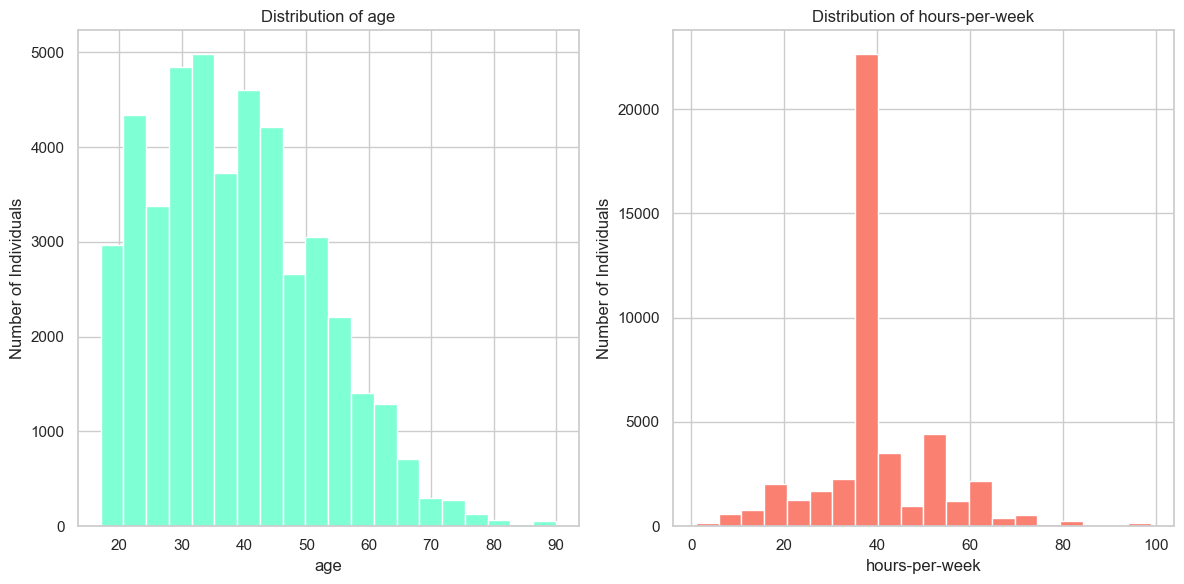

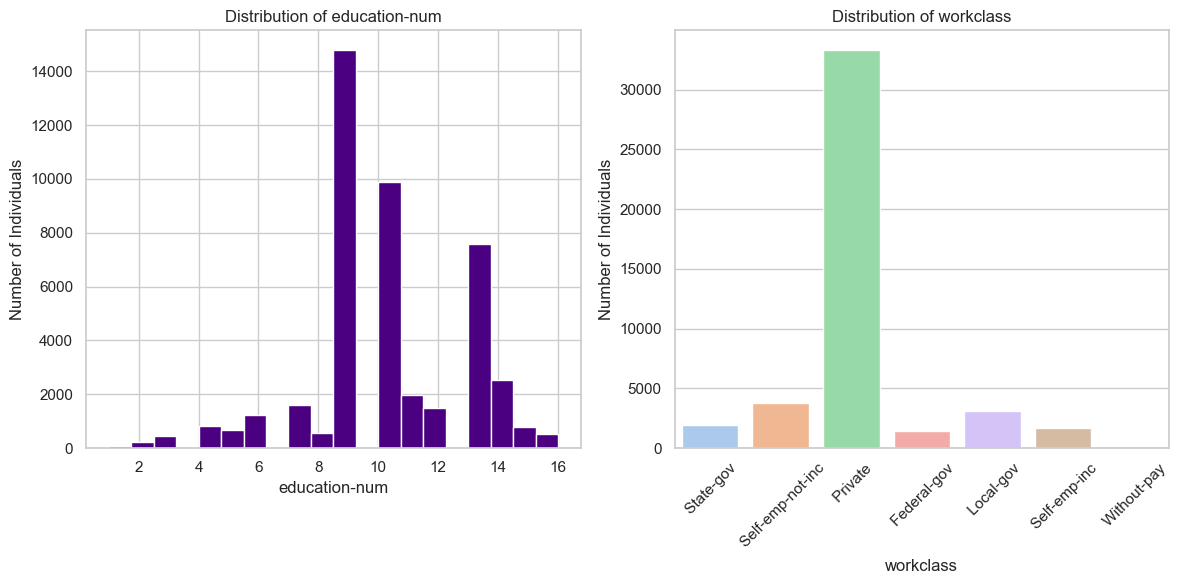

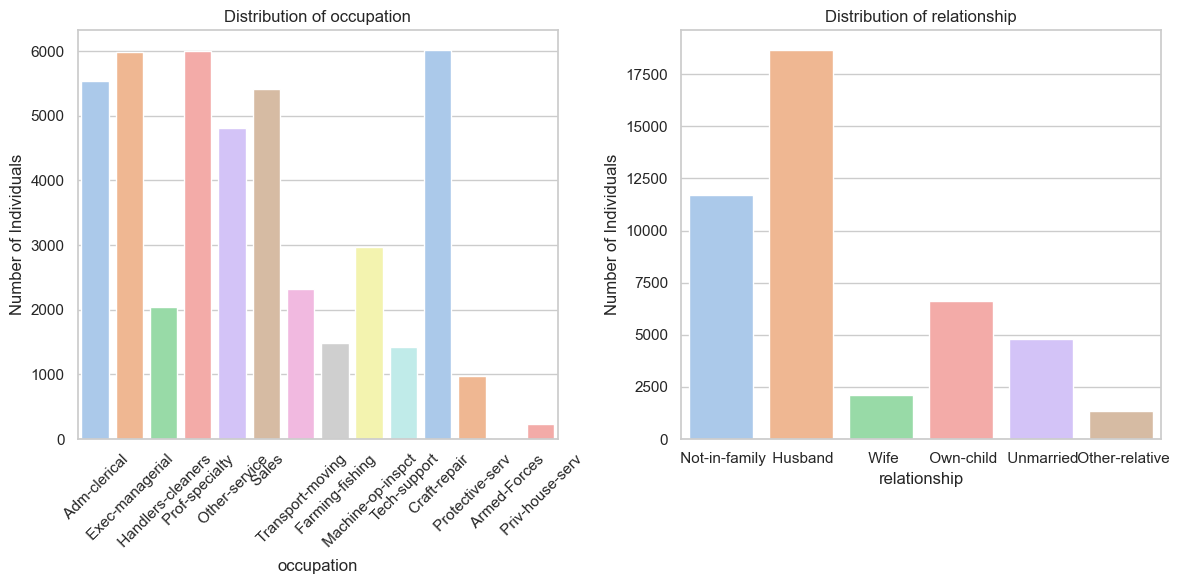

In [38]:
# Iterate over each pair of features
for i in range(0, len(features), 2):
    # Set the width and height of the plot
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the first feature in the pair
    feature = features[i]
    if df[feature].dtype in ['int64', 'float64']:
        axs[0].hist(df[feature], bins=20, color=colors[i])
    else:
        sns.countplot(x=feature, data=df, ax=axs[0], palette=colors[i])
        if feature in ['occupation', 'workclass']:
            axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_title(f'Distribution of {feature}')
    axs[0].set_xlabel(feature)
    axs[0].set_ylabel('Number of Individuals')

    # Plot the second feature in the pair, if it exists
    if i + 1 < len(features):
        feature = features[i + 1]
        if df[feature].dtype in ['int64', 'float64']:
            axs[1].hist(df[feature], bins=20, color=colors[i + 1])
        else:
            sns.countplot(x=feature, data=df, ax=axs[1], palette=colors[i + 1])
            if feature in ['occupation', 'workclass']:
                axs[1].tick_params(axis='x', rotation=45)
        axs[1].set_title(f'Distribution of {feature}')
        axs[1].set_xlabel(feature)
        axs[1].set_ylabel('Number of Individuals')

    # Display the plot
    plt.tight_layout()
    plt.show()

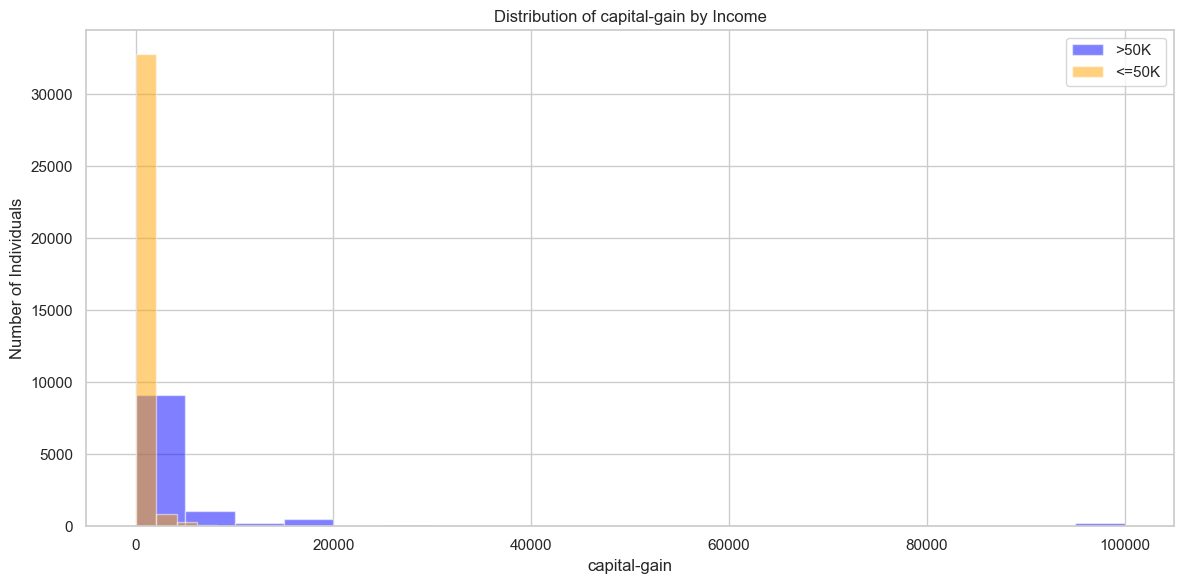

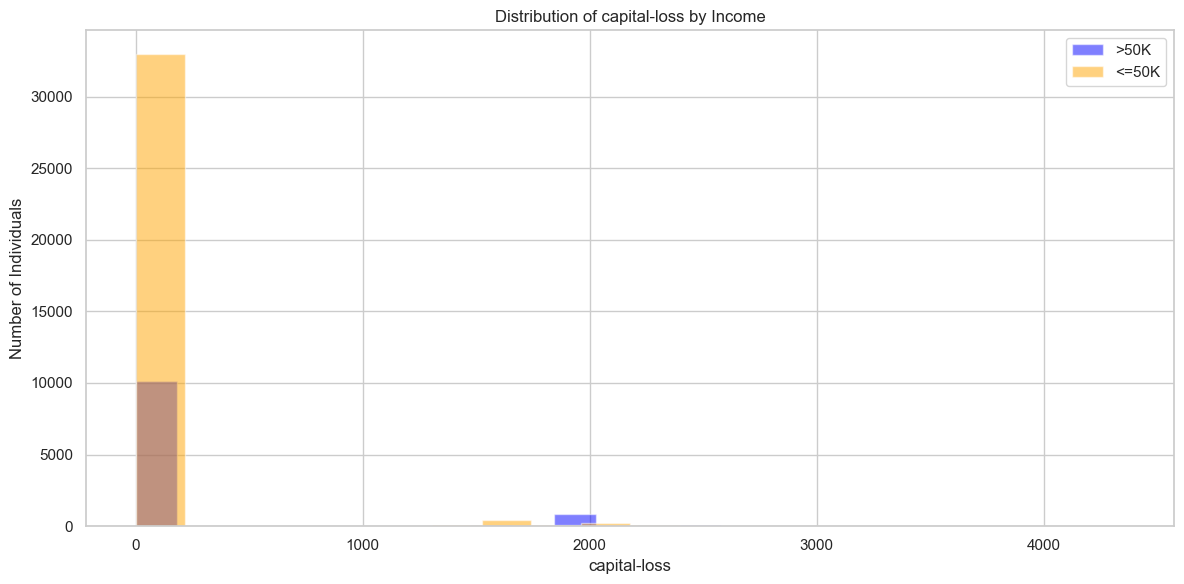

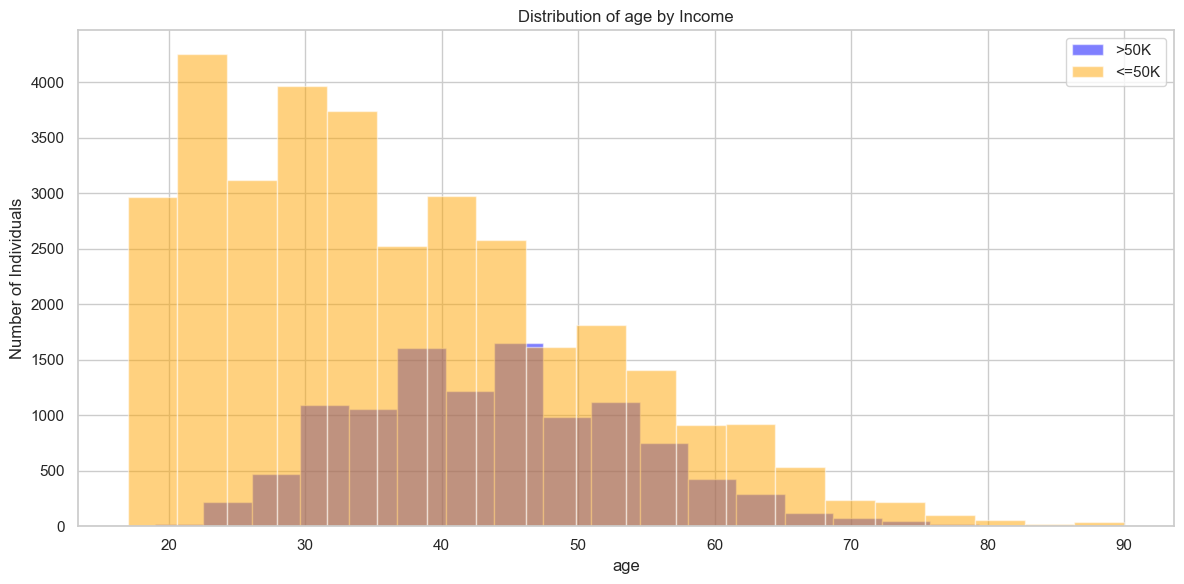

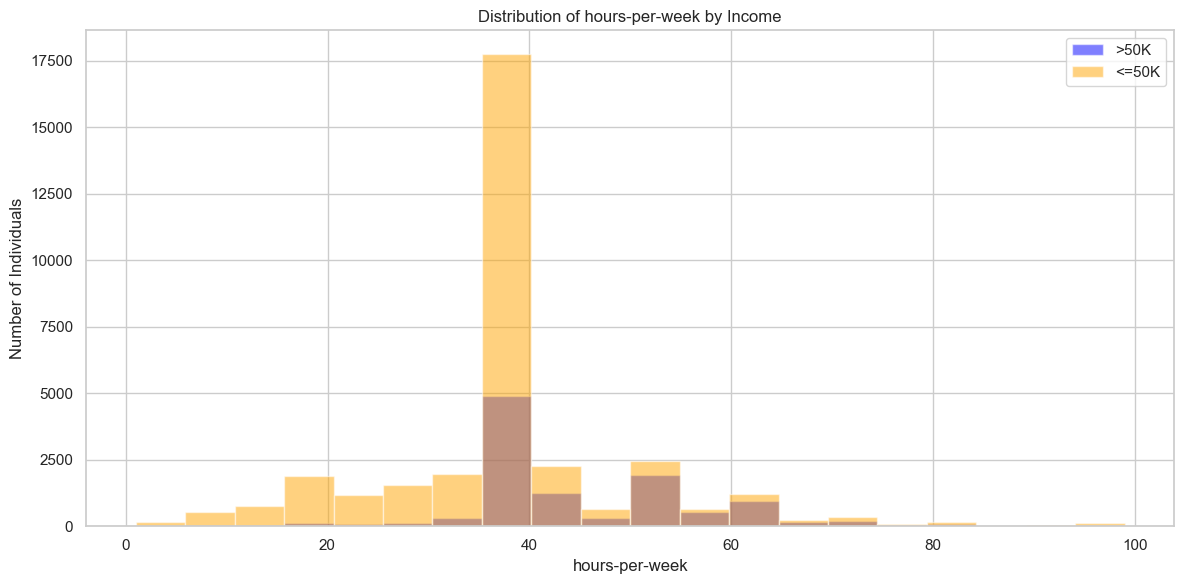

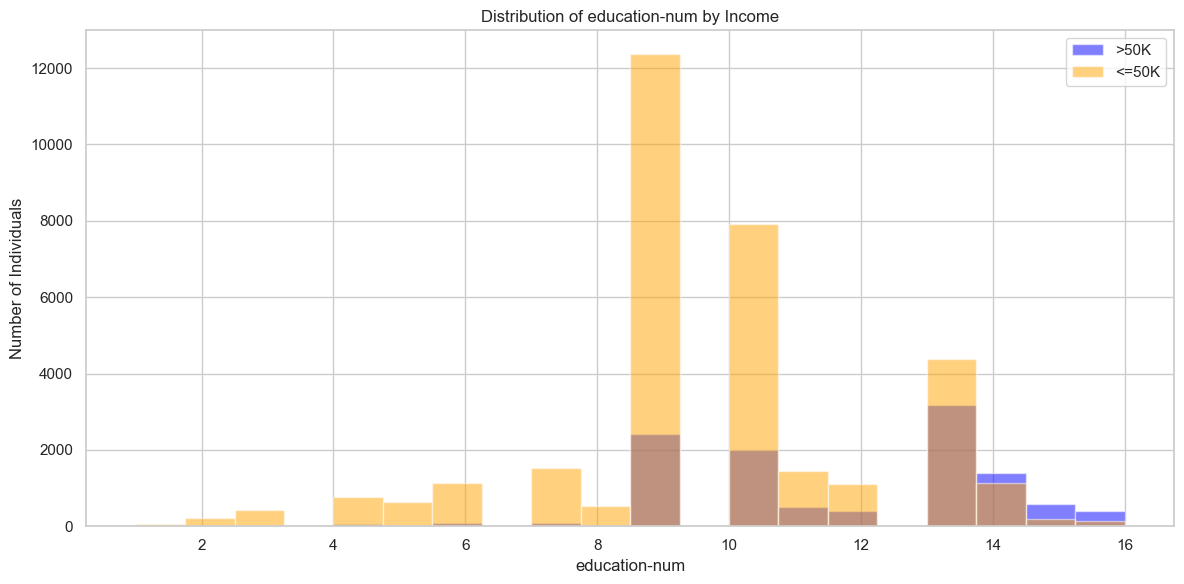

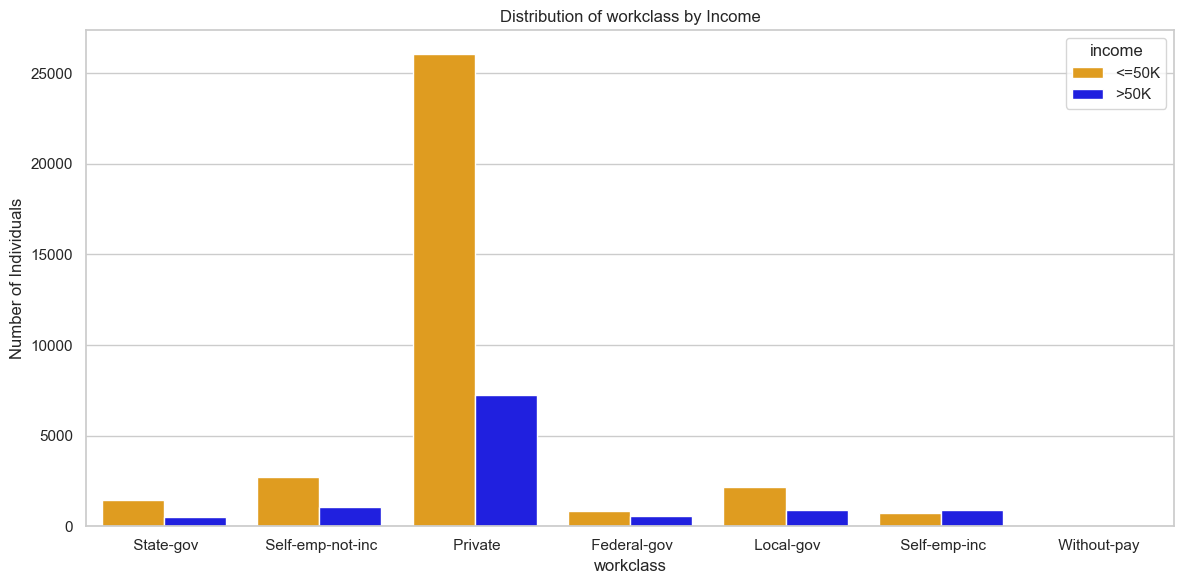

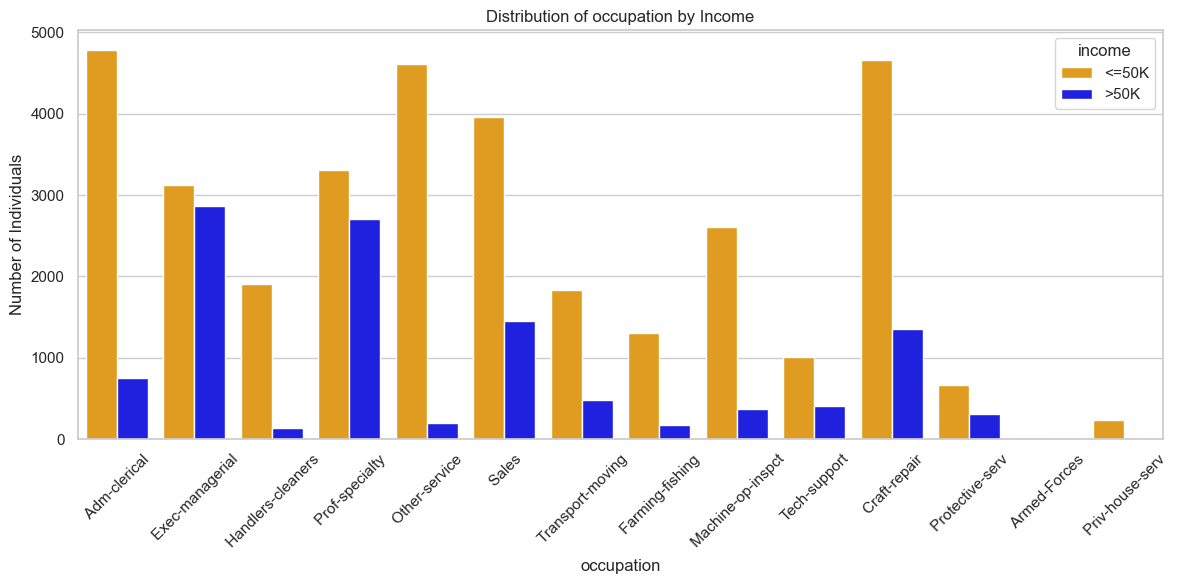

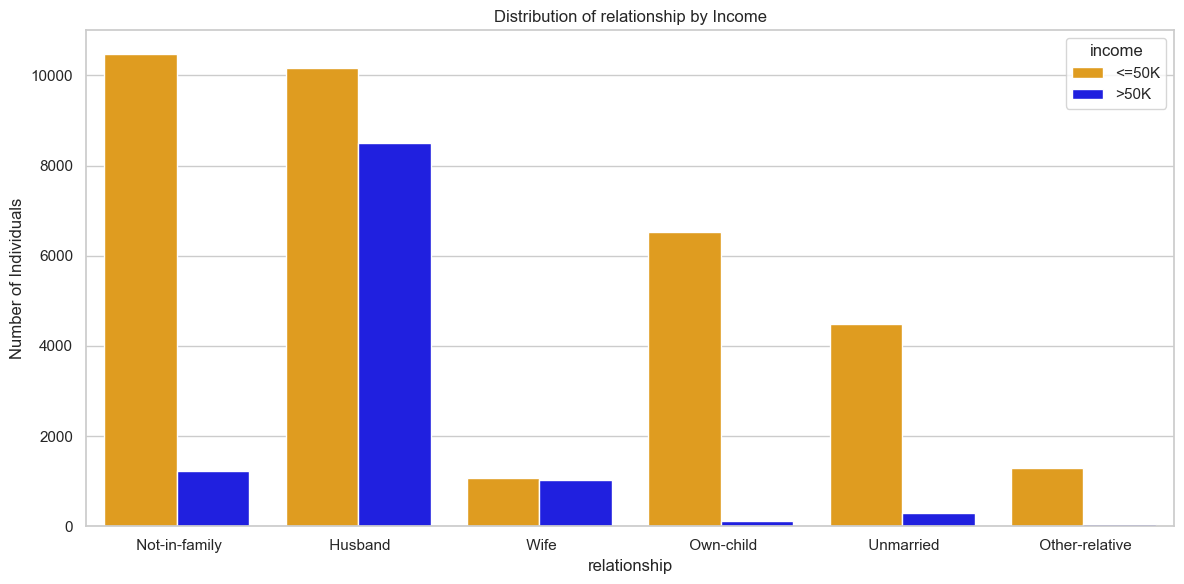

In [27]:
# Define the colors to use for the '>50K' and '<=50K' categories
colors = {'>50K': 'blue', '<=50K': 'orange'}

# Iterate over each feature
for i, feature in enumerate(features):
    # Set the width and height of the plot
    plt.figure(figsize=(12, 6))

    # Check if the feature is numerical
    if df[feature].dtype in ['int64', 'float64']:
        # Plot a histogram of the feature for each income category
        plt.hist(df[df['income'] == '>50K'][feature], bins=20, color=colors['>50K'], alpha=0.5, label='>50K')
        plt.hist(df[df['income'] == '<=50K'][feature], bins=20, color=colors['<=50K'], alpha=0.5, label='<=50K')
        plt.title(f'Distribution of {feature} by Income')
        plt.xlabel(feature)
        plt.ylabel('Number of Individuals')
        plt.legend()
    else:
        # Plot a countplot of the feature for each income category
        sns.countplot(x=feature, hue='income', data=df, palette=colors)
        plt.title(f'Distribution of {feature} by Income')
        plt.xlabel(feature)
        plt.ylabel('Number of Individuals')
        if feature == 'occupation':
            plt.xticks(rotation=45)

    # Display the plot
    plt.tight_layout()
    plt.show()

## 2 - Preparing the data

Before utilizing data as input for machine learning algorithms, it often requires cleaning, formatting, and restructuring, a process commonly known as **preprocessing**. While this dataset doesn't contain invalid or missing entries as we saw before, there are certain characteristics about certain features that need adjustment. This preprocessing step can significantly enhance the outcome and predictive power of most learning algorithms.

### Transforming Skewed Continuous Features:



A dataset may contain at least one feature whose values tend to cluster around a single number but also include a non-trivial number of vastly larger or smaller values compared to that single number. Algorithms can be sensitive to such distributions of values and may underperform if the range is not appropriately normalized. In the census dataset, two features exhibit this behavior as we saw in the previous plotting: 'capital-gain' and 'capital-loss'.

For highly-skewed feature distributions, it's a standard approach to apply a logarithmic transformation to the data to prevent very large and very small values from negatively impacting the performance of a learning algorithm. Employing a logarithmic transformation substantially narrows the range of values influenced by outliers.

In [52]:
# Split the data into features and target label
y_raw = df['income']
X_raw = df.drop('income', axis = 1)

In [55]:
# Identify the features that are skewed
skewed_features = ['capital-gain', 'capital-loss']

# Apply a log transformation to each of the skewed features
# The "+1" inside the log function is used to avoid division by zero errors
# The transformed features are stored back into the original DataFrame
X_raw[skewed_features] = df[skewed_features].apply(lambda x: np.log(x + 1))


In [70]:
# We can see how values have changed after applying the log transformation
for column in X_raw[skewed_features]:
    print(column, X_raw[skewed_features][column].unique().tolist())


capital-gain [7.684783943522785, 0.0, 9.552865680310473, 8.552367266423891, 8.519989278718239, 7.786551806428712, 9.571156728415465, 9.617470759403409, 8.94754601503218, 8.310169021981912, 8.386400901166214, 8.895492631451633, 7.251344983372214, 8.209308411646937, 6.962243464266207, 7.62608275807238, 7.685703061234547, 6.38856140554563, 9.906084178383393, 8.83200393125627, 8.319229938632326, 9.06126014896203, 8.13505390861157, 7.862497197230545, 10.136066450636823, 8.444837529224097, 7.80954132465341, 8.04044688130311, 9.269175157697076, 7.994632311431825, 8.109525659752872, 7.855932199718614, 8.15248607578024, 8.490027523343468, 11.512925464970229, 8.781862489558945, 7.294377299288821, 7.753623546559746, 7.652545692693921, 7.9676267393338165, 9.261128538808288, 7.697575346802343, 7.993619994827744, 10.233833921427351, 8.81996090128606, 7.709308333385869, 7.317876198626496, 9.514215624322715, 7.877017895622398, 8.622813673279921, 8.473868066677865, 8.238008249218403, 8.051340933292979,

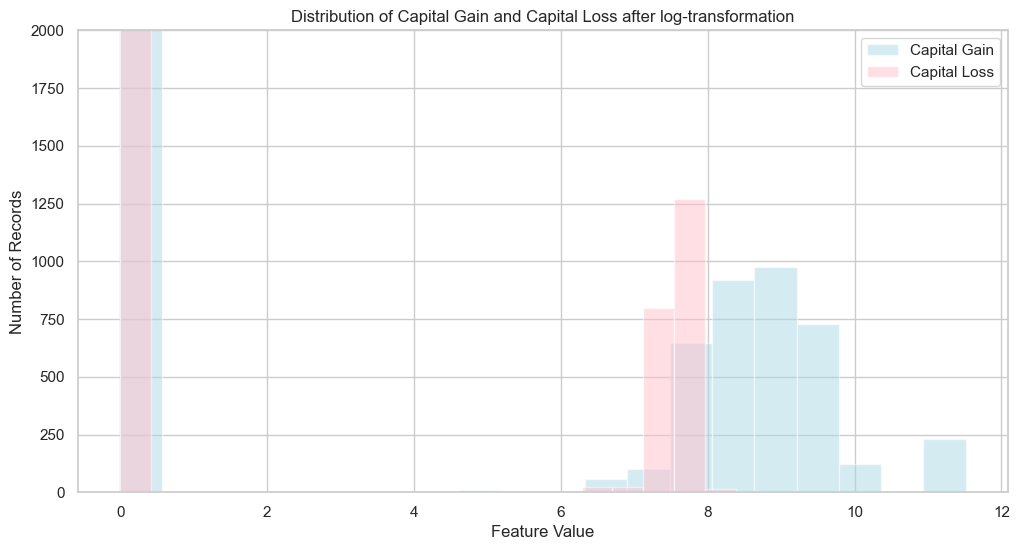

In [65]:
# Visualize the newly transformed distributions
# Set the width and height of the plot
plt.figure(figsize=(12, 6))

# Plot a histogram of each of the skewed features
plt.hist(X_raw['capital-gain'], bins=20, color='lightblue', alpha=0.5, label='Capital Gain')
plt.hist(X_raw['capital-loss'], bins=20, color='pink', alpha=0.5, label='Capital Loss')

plt.ylim([0, 2000])

plt.title('Distribution of Capital Gain and Capital Loss after log-transformation')
plt.xlabel('Feature Value')
plt.ylabel('Number of Records')
plt.legend()

# Display the plot
plt.show()

### Normalizing Numerical Features

Besides transforming skewed features, it's a common practice to scale numerical features. Scaling doesn't alter the shape of each feature's distribution (like 'capital-gain' or 'capital-loss' above), but normalization ensures equal treatment of each feature when using supervised learners. It's important to note that after scaling, __the original meaning of the data in its raw form may no longer be accurately observed__.

In [72]:
# Import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Define the numerical features that we want to scale
numerical_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Apply the scaler to the numerical features in the data
# The fit_transform method fits the scaler to the data and then transforms the data
X_raw[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first record in the DataFrame to see the effect of the scaling
# The head method returns the first n rows of the DataFrame
display(X_raw.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


        The choice between using MinMaxScaler and StandardScaler depends on the specific requirements of your machine learning algorithm and the nature of your data.

        MinMaxScaler scales the data to a fixed range (usually 0 to 1), which is a good choice when the algorithm doesn't assume that the data follows a normal distribution. This can be useful with algorithms that do not make this assumption, such as K-Nearest Neighbors and Neural Networks.

        On the other hand, StandardScaler standardizes the data by removing the mean and scaling to unit variance. This scaler is a good choice when the algorithm assumes that the data is normally distributed, such as in algorithms like Support Vector Machines and Linear Regression.

        In the provided code, MinMaxScaler is used, which could indicate that the algorithm being used does not assume a normal distribution of the data, or that the range of the data is more important than preserving the data's mean and variance characteristics.

### Data Preprocessing


Based on the data table explored earlier, we notice that several features for each record are non-numeric. Generally, learning algorithms require input to be numeric, necessitating the conversion of non-numeric features (referred to as categorical variables). One common approach for this conversion is using the one-hot encoding scheme, which generates a "dummy" variable for each possible category of each non-numeric feature.

Furthermore, similar to the non-numeric features, we must convert the non-numeric target label, 'income', into numerical values for the learning algorithm to function. Given that there are only two possible categories for this label ("<=50K" and ">50K"), we can bypass using one-hot encoding and simply encode these two categories as 0 and 1, respectively.

In [88]:
# Apply one-hot encoding to the 'X_raw' data
# This creates a binary column for each category in each non-numeric feature
features = pd.get_dummies(X_raw, dtype=int)

# Convert the 'y_raw' data to numerical values
# This is done by applying a lambda function that returns 1 if the income is '>50K' and 0 otherwise
income = y_raw.apply(lambda x: 1 if x == '>50K' else 0)

# Get the list of all the column names in the 'features' DataFrame
# These are the names of the features after one-hot encoding
encoded_feature_names = list(features.columns)

# Print the total number of features after one-hot encoding
print(f"{len(encoded_feature_names)} total features after one-hot encoding.")

# Uncomment the following line to print the names of the encoded features
# This line is commented out due to the potentially large output size
print(encoded_feature_names)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [89]:
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

### Shuffle and Split Data

Now that all categorical variables have been converted into numerical features and all numerical features have been normalized, the next step is to split the data (both features and their labels) into training and test sets. We'll allocate 80% of the data for training and 20% for testing, as is commonly done.

In [90]:
# Import the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
# The test_size parameter specifies the proportion of the data to use for the test set
# The random_state parameter ensures that the splits generate are reproducible
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size=0.2, random_state=42)

# Print the number of samples in the training set
# The shape attribute of a DataFrame returns a tuple representing the dimensions of the DataFrame
# The first element of the tuple is the number of rows, which is the number of samples
print(f"Training set has {X_train.shape[0]} samples.")

# Print the number of samples in the testing set
print(f"Testing set has {X_test.shape[0]} samples.")

Training set has 36177 samples.
Testing set has 9045 samples.


## 3 - Modeling

### Evaluating Model Performance

#### Metrics and the Naive Predictor

CharityML, armed with their research, knows that individuals who earn more than $50,000 are most likely to donate to their charity. Hence, CharityML is particularly interested in accurately predicting who earns more than $50,000. Accuracy seems like an appropriate metric for evaluating a model's performance in this case. Additionally, misclassifying someone who doesn't earn more than $50,000 as someone who does would be detrimental to CharityML's goals, as they are seeking individuals willing to donate. Therefore, the model's precision in predicting those who earn more than $50,000 is more important than its recall (meaning it's better all detected positive are true positive than detecting more positives but with some of them being false ones). We can utilize the F-beta score as a metric that balances both precision and recall.

The F-beta score is a single metric that combines both precision and recall into a single value. It's an extension of the F1 score, which is the harmonic mean of precision and recall. The F-beta score allows you to give more weight to either precision or recall, depending on the value of the beta parameter.
Specifically, when beta < 1, more emphasis is placed on precision (what we want), when beta > 1, it gives more weight to recall, and when beta = 1, it0s the same as the F1 score.

Examining the class distribution (those who earn at most $50,000), we realize that this distribution imbalance can significantly impact accuracy. This imbalance means that we could simply predict "this person does not earn more than $50,000" and generally be correct, without even examining the data. Making such a claim is considered naive because it doesn't consider any information to support the assertion. It's crucial to consider the naive prediction for your data to establish a baseline for evaluating model performance. However, using this prediction would be futile: if we predicted that all individuals earned less than $50,000, CharityML would identify no potential donors.

In [91]:
# Let's examine the imbalance of the training data
# Calculate the number of positive and negative examples in the training data
n_positives = y_train.sum()
n_negatives = y_train.shape[0] - n_positives

# Calculate the percentage of positive and negative examples in the training data
positive_ratio = n_positives / y_train.shape[0]
negative_ratio = n_negatives / y_train.shape[0]

# Print the results
print(f"Number of positive examples in the training data: {n_positives}")
print(f"Number of negative examples in the training data: {n_negatives}")
print(f"Percentage of positive examples in the training data: {positive_ratio * 100:.2f}%")
print(f"Percentage of negative examples in the training data: {negative_ratio * 100:.2f}%")

Number of positive examples in the training data: 8908
Number of negative examples in the training data: 27269
Percentage of positive examples in the training data: 24.62%
Percentage of negative examples in the training data: 75.38%


        There are some strategies we can implement so we can mitigate the impact of class imbalance and improve the performance of your model on imbalanced datasets.

        1. Resampling Techniques:
        - Undersampling: Reduce the number of majority class samples to balance the class distribution.
        - Oversampling: Increase the number of minority class samples to balance the class distribution. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used for generating synthetic samples.
        2. Algorithmic Techniques:
        - Use algorithms that are robust to class imbalance, such as ensemble methods like Random Forest, Gradient Boosting Machines (GBM), or XGBoost.
        - Specify class weights: Many machine learning algorithms allow you to specify class weights to give higher importance to minority class samples during training.
        3. Evaluation Metrics:
        - Instead of accuracy, consider using evaluation metrics that are less sensitive to class imbalance, such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC).
        4. Data Preprocessing:
        - Feature selection or dimensionality reduction techniques can help in removing noisy or irrelevant features and improve the model's ability to learn from minority class samples.
        - Ensure that your data preprocessing steps, such as scaling, encoding, or imputation, are applied consistently across both classes.
        5. Cross-validation:
        - Use techniques like stratified cross-validation to ensure that each fold preserves the class distribution, especially if you have a small dataset.
        6. Ensemble Methods:
        - Ensemble methods like bagging and boosting can be effective in handling class imbalance, as they combine multiple models to make predictions, which can help in mitigating bias towards the majority class.
        7. Collect More Data:
        - If feasible, collecting more data, especially for the minority class, can help improve the model's ability to learn from both classes.

##### Naive Predictor Performance:

What if we selected a model that always predicted an individual earned more than $50,000? What would be the accuracy and F-score of that model on this dataset?

In [92]:
# Calculate accuracy: the proportion of income entries correctly predicted
# This is the number of '>50K' entries divided by the total number of entries
accuracy = individuals_earning_more_than_50k / total_records

# Calculate precision: the proportion of '>50K' predictions that were correct
# This is the number of '>50K' entries divided by the total number of '>50K' and '<=50K' entries
precision = individuals_earning_more_than_50k / (individuals_earning_more_than_50k + individuals_earning_at_most_50k)

# Calculate recall: the proportion of actual '>50K' entries that were correctly predicted
# This is the number of '>50K' entries divided by the total number of '>50K' entries and false negatives (which are 0 in this case)
recall = individuals_earning_more_than_50k / (individuals_earning_more_than_50k + 0)

# Calculate F-score using the formula for beta = 0.5
# The F-score is the harmonic mean of precision and recall, with more weight given to precision
fscore = (1 + 0.5**2) * (precision * recall) / ((0.5**2 * precision) + recall)

# Print the accuracy and F-score
print(f"Naive Predictor: [Accuracy score: {accuracy:.4f}, F-score: {fscore:.4f}]")

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


### Supervised Learning Models

#### Model Application

Now we'll select three supervised learning models from above that are suitable for this problem and test them on the census data.

##### __Decision Trees__:

- Real-world application: Decision Trees and CART are often used in financial analysis, such as predicting which stocks to buy based on past performance.

- Strengths:
    Handles both categorical and numerical data.
    Requires minimal data pre-processing and can handle non-normalized or non-encoded data.
    Easy to understand and interpret.
- Weaknesses:
    Complex Decision Trees may not generalize well and can overfit.
    Prone to instability as small variations in the data can lead to different decision trees.
    Can produce biased trees if certain classes dominate.
- Candidacy: Decision Trees are suitable for our case since they can handle both numerical and categorical data. Additionally, their interpretability allows us to understand the results.


#####  __Support Vector Machines (SVM)__:

- Real-world application: SVMs are used in image classification and segmentation tasks, such as face detection in images.

- Strengths:
    Effective in high-dimensional spaces and with many features.
    Kernel functions can be customized for different scenarios, making SVMs versatile.

- Weaknesses:
    Less effective with large datasets.
    Does not directly provide probability estimates.

- Candidacy: SVMs are chosen due to their effectiveness in high-dimensional spaces, which is relevant given our dataset has over 100 features. The dataset size is not large enough to be a limiting factor.


##### __Ensemble methods: AdaBoost__:

- Real-world application: Ensemble methods, including AdaBoost, are widely used in Kaggle competitions and image detection tasks, such as object detection in sports events.

- Strength:
    Ensemble methods offer improved generalizability and robustness compared to single estimators.
    Simple models can be combined to create a complex model, which is computationally efficient.

- Weaknesses:
    Biased underlying classifiers can lead to biased boosted models.

- Candidacy: AdaBoost is a popular boosting algorithm known for producing high-quality classifiers. Given the class imbalance in our dataset, boosting might be robust to this issue.



#### Creating a Training and Predicting Pipeline:

To effectively evaluate the performance of each chosen model, it's crucial to create a training and predicting pipeline. This pipeline should enable us to quickly and efficiently train models using different sizes of training data and make predictions on the testing data.

In [96]:
# Import the required metrics from sklearn
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    This function trains a machine learning algorithm and makes predictions.

    Inputs:
       - learner: The learning algorithm to be trained and predicted on
       - sample_size: The size of samples (number) to be drawn from the training set
       - X_train: Features training set
       - y_train: Income training set
       - X_test: Features testing set
       - y_test: Income testing set
    '''
    
    # Initialize a dictionary to hold the results
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size'
    # Record the training time
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set and the first 300 training samples
    # Record the prediction time
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on the test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Print the name of the learner and the number of samples
    print(f"{learner.__class__.__name__} trained on {sample_size} samples.")
        
    # Return the results
    return results

* Selecting the first 300 samples might introduce bias if the data is ordered or not shuffled properly. It's generally a good practice to shuffle the data or select samples randomly to get unbiased estimates of the model performance:

In [100]:
# Import the required metrics from sklearn
from sklearn.metrics import fbeta_score, accuracy_score
import timeit

def compute_scores(y_true, y_pred):
    """Compute accuracy and F-score."""
    acc = accuracy_score(y_true, y_pred)
    f_score = fbeta_score(y_true, y_pred, beta=0.5)
    return acc, f_score

In [101]:
from sklearn.utils import shuffle

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    This function trains a machine learning algorithm and makes predictions.

    Inputs:
       - learner: The learning algorithm to be trained and predicted on
       - sample_size: The size of samples (number) to be drawn from the training set
       - X_train: Features training set
       - y_train: Income training set
       - X_test: Features testing set
       - y_test: Income testing set
    '''
    
    results = {}
    X_train = X_train[:sample_size]
    y_train = y_train[:sample_size]

    start = timeit.default_timer()
    learner = learner.fit(X_train, y_train)
    results['train_time'] = timeit.default_timer() - start

    # Shuffle the data and select the first 300 samples
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=0)

    start = timeit.default_timer()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train_shuffled[:300])
    results['pred_time'] = timeit.default_timer() - start

    results['acc_train'], results['f_train'] = compute_scores(y_train_shuffled[:300], predictions_train)
    results['acc_test'], results['f_test'] = compute_scores(y_test, predictions_test)
       
    print(f"{learner.__class__.__name__} trained on {sample_size} samples.")
        
    return results

### Model Evaluation

We'll train and test the models using training sets of varying sizes to observe how it influences their runtime and predictive performance on both the test and training sets.

DecisionTreeClassifier trained on 362 samples.
DecisionTreeClassifier trained on 3618 samples.
DecisionTreeClassifier trained on 36177 samples.
SVC trained on 362 samples.
SVC trained on 3618 samples.
SVC trained on 36177 samples.
AdaBoostClassifier trained on 362 samples.
AdaBoostClassifier trained on 3618 samples.
AdaBoostClassifier trained on 36177 samples.


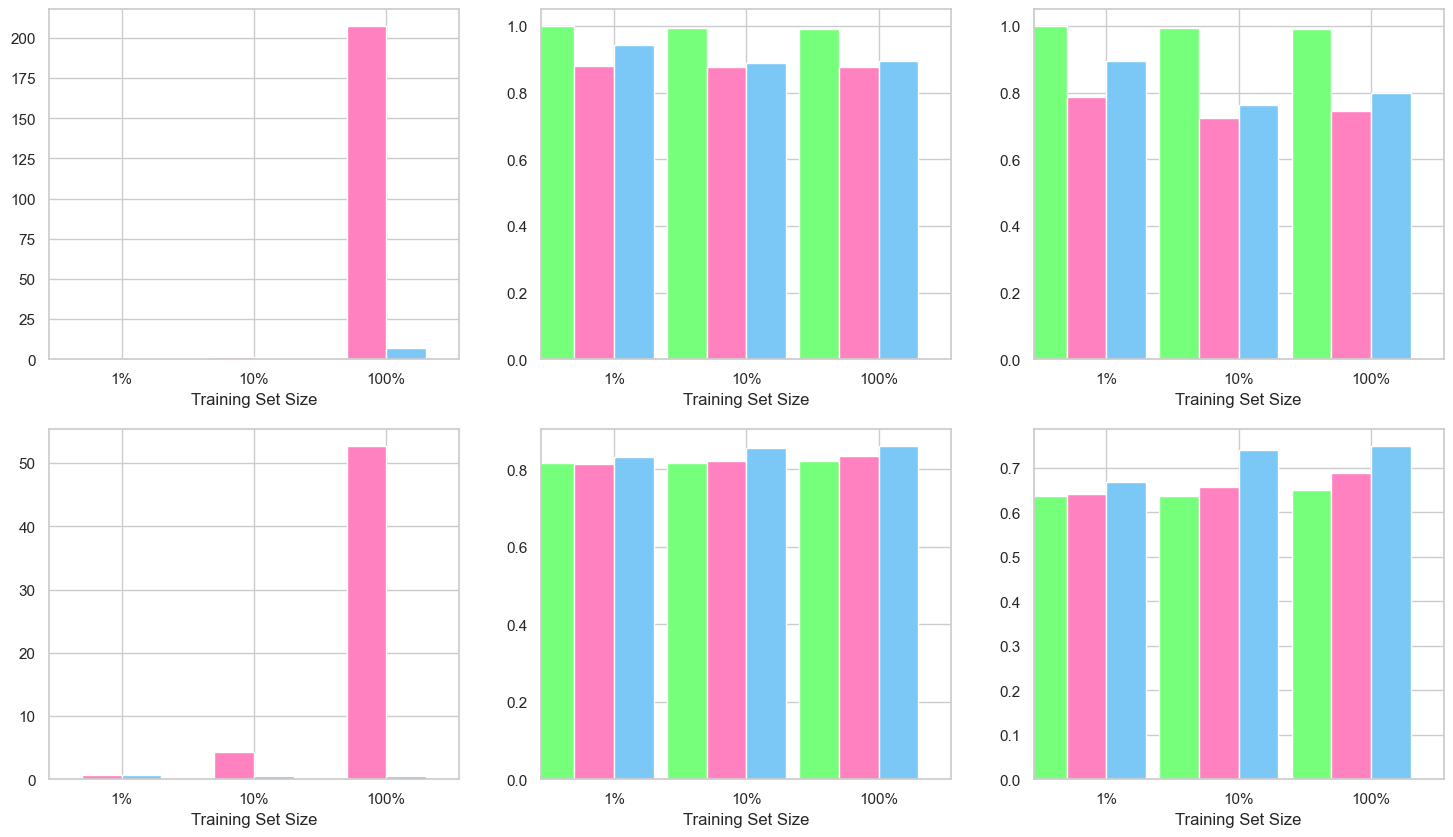

In [108]:
# Import the required supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize the three models with a random state for reproducibility
clf_A = DecisionTreeClassifier(random_state=42)
clf_B = SVC(random_state=42)
clf_C = AdaBoostClassifier(random_state=42)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# These are rounded to the nearest integer
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Initialize a dictionary to hold the results
results = {}

# Loop over the classifiers
for clf in [clf_A, clf_B, clf_C]:
    # Get the name of the classifier
    clf_name = clf.__class__.__name__
    # Initialize a dictionary for this classifier
    results[clf_name] = {}
    # Loop over the sample sizes
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        # Train and predict using this classifier and sample size, and store the results
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Let's display the results to visualize them
results

# Let's visualize the results plotting them
# Import the matplotlib library
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create figure
fig, ax = plt.subplots(2, 3, figsize = (18, 10))

# Constants
bar_width = 0.3
colors = ['#76FF7B','#FF81C0','#7BC8F6']
models = ['Decision Tree', 'SVM', 'AdaBoost']

# Super loop to plot four panels of data
for k, learner in enumerate(results.keys()):
    for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
        for i in np.arange(3):
                
            # Creative plot code
            ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
            ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
            ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
            ax[j//3, j%3].set_xlabel("Training Set Size")
            ax[j//3, j%3].set_xlim((-0.1, 3.0))




Additionally, we can display the numerical values alongside the visualizations to allow for a more detailed examination of the results.

In [109]:
# Loop over the items in the results dictionary
for classifier_name, classifier_results in results.items():
    # Print the name of the classifier
    print(classifier_name)
    # Convert the results dictionary for this classifier into a DataFrame
    results_df = pd.DataFrame(classifier_results)
    # Rename the columns of the DataFrame
    results_df = results_df.rename(columns={0: '1%', 1: '10%', 2: '100%'})
    # Display the DataFrame
    display(results_df)

DecisionTreeClassifier


,1%,10%,100%
train_time,0.119428,0.086627,0.906347
pred_time,0.052337,0.020523,0.024438
acc_train,1.000000,0.993333,0.990000
f_train,1.000000,0.993151,0.990712
acc_test,0.815589,0.815257,0.821227
f_test,0.637015,0.637336,0.648919


SVC


,1%,10%,100%
train_time,0.043055,1.147119,207.540405
pred_time,0.706138,4.308671,52.735293
acc_train,0.880000,0.876667,0.876667
f_train,0.787402,0.725000,0.745455
acc_test,0.814594,0.820785,0.834494
f_test,0.640385,0.657083,0.688333


AdaBoostClassifier


,1%,10%,100%
train_time,0.382660,0.956767,7.172885
pred_time,0.595178,0.554870,0.538471
acc_train,0.943333,0.890000,0.893333
f_train,0.893939,0.763889,0.798479
acc_test,0.830846,0.854395,0.860697
f_test,0.668480,0.739145,0.749146


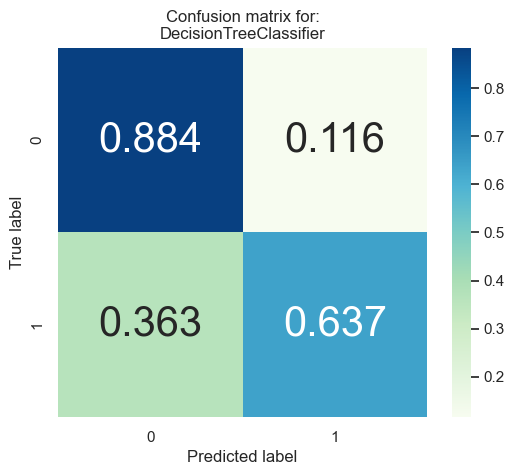

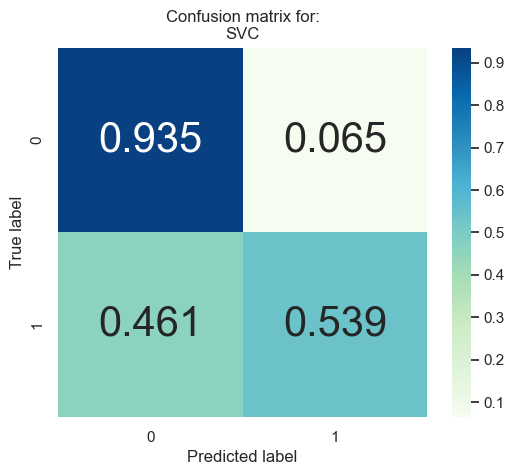

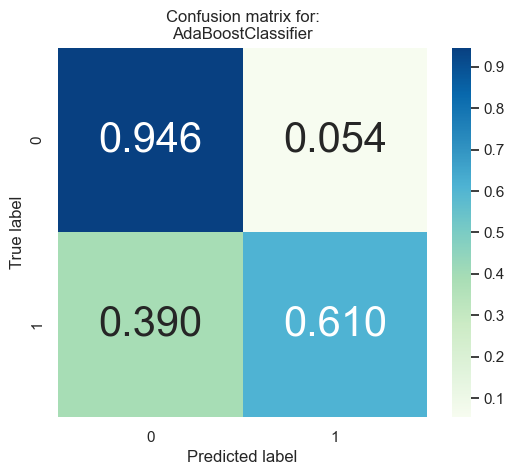

In [111]:
# Import the required function for computing confusion matrix
from sklearn.metrics import confusion_matrix

# Loop over the classifiers
for i, model in enumerate([clf_A, clf_B, clf_C]):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    # Normalize the confusion matrix by row (i.e., by the number of samples in each class)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Create a new figure for this classifier
    plt.figure(i)
    # Visualize the confusion matrix using a heatmap
    sns.heatmap(cm, annot=True, annot_kws={"size": 30}, cmap='GnBu', square=True, fmt='.3f')
    # Add labels and title
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion matrix for:\n{model.__class__.__name__}')

Based on the results above, AdaBoost emerges as the most suitable model for our task.

AdaBoost exhibits superior performance on the testing data, boasting higher accuracy and F-score compared to the other classifiers. Furthermore, it demonstrates relatively swift training times on the full dataset, consuming only a fraction of the time taken by SVM, the next most efficient classifier. Thus, AdaBoost appears scalable even with larger datasets.

##### AdaBoost operation

AdaBoost operates by amalgamating multiple simple learners, such as decision trees, into an ensemble to predict whether an individual earns above $50k. Each learner, typically a decision tree, utilizes features like age, occupation, and education to generate rules for predicting income.

During the training phase, AdaBoost focuses on instances where it made erroneous predictions and prioritizes the accurate prediction of those instances in subsequent rounds. With each round, the algorithm selects the best learner (decision tree) to include in the ensemble, iterating this process for a specified number of rounds or until further improvement in predictions is unattainable.

All learners are then combined to create a final ensemble model, where each contributes to predicting whether an individual earns more than $50k. Typically, the majority vote determines the final prediction.

Utilizing this model with census data, we can predict income levels for potential donors and determine the likelihood of their contribution to charity.

#### Improving our Model: Model Tuning

To enhance our model further, we can employ model tuning via grid search (_GridSearchCV_). This involves experimenting with different parameter/value combinations to optimize performance. For AdaBoost, we'll focus on tuning parameters such as n_estimators, learning rate, and base classifier parameters, considering that our base classifier for the AdaBoost ensemble is a decision tree.

In [112]:
# Import the necessary libraries for GridSearchCV and scoring
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the AdaBoostClassifier with a DecisionTreeClassifier as the base estimator
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier())

# Define the parameters for tuning
parameters = {
    'n_estimators': [50, 120],
    'learning_rate': [0.1, 0.5, 1.],
    'base_estimator__min_samples_split': np.arange(2, 8, 2),
    'base_estimator__max_depth': np.arange(1, 4, 1)
}

# Create an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# Perform grid search on the classifier using the scorer as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data to find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the best estimator from the grid search
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized model and the optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-after scores
print("Unoptimized model\n------")
print(f"Accuracy score on testing data: {accuracy_score(y_test, predictions):.4f}")
print(f"F-score on testing data: {fbeta_score(y_test, predictions, beta=0.5):.4f}")
print("\nOptimized Model\n------")
print(f"Final accuracy score on the testing data: {accuracy_score(y_test, best_predictions):.4f}")
print(f"Final F-score on the testing data: {fbeta_score(y_test, best_predictions, beta=0.5):.4f}")
print(best_clf)

C:\Users\mar27\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\mar27\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\mar27\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
C:\Users\mar27\AppData\Roaming\Python\Python31

Unoptimized model
------
Accuracy score on testing data: 0.8303
F-score on testing data: 0.6695

Optimized Model
------
Final accuracy score on the testing data: 0.8701
Final F-score on the testing data: 0.7698
AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    min_samples_split=4),
                   learning_rate=0.1, n_estimators=120)


#### Final Model Evaluation

__put it right__

__Results__:

| Metric           | Benchmark Predictor | Unoptimized Model | Optimized Model | 
|------------------|---------------------|-------------------|-----------------|
|  Accuracy        | 0.2478              | 0.8303            | 0.8701          |
| F-score          | 0.2917              | 0.6695            | 0.7698          | 


The optimized model has an accuracy of 0.8701 and F-score of 0.7698.

These scores are better than the umpotimized model, while being substantially better than the benchmark predictor.

#### Feature Importance

Identifying the most predictive features is crucial in supervised learning, as it simplifies our understanding of the phenomenon at hand. In our case, we aim to pinpoint a select few features that strongly influence whether an individual earns at most or more than $50,000.


##### Feature Relevance Observation


Considering the thirteen available features in the census data, I hypothesize that the following five features are most critical for prediction:

- Occupation: Variances in job types lead to disparities in pay scales, with some professions offering higher salaries than others.

- Education: Higher levels of education often correlate with access to more technical or specialized roles that command higher salaries.

- Age: Accumulated wealth tends to increase with age, making it a potentially significant predictor of income.

- Workclass: The class of employment can impact earnings, with certain sectors offering higher wages than others.

- Hours-per-week: Longer work hours typically result in higher earnings, making this feature relevant for income prediction.


These features are ranked based on their perceived impact on an individual's income, with occupation deemed the most influential due to its direct association with salary levels.

Now, let's leverage our algorithm to evaluate and rank the features according to their importance.

##### Extracting Feature Importance

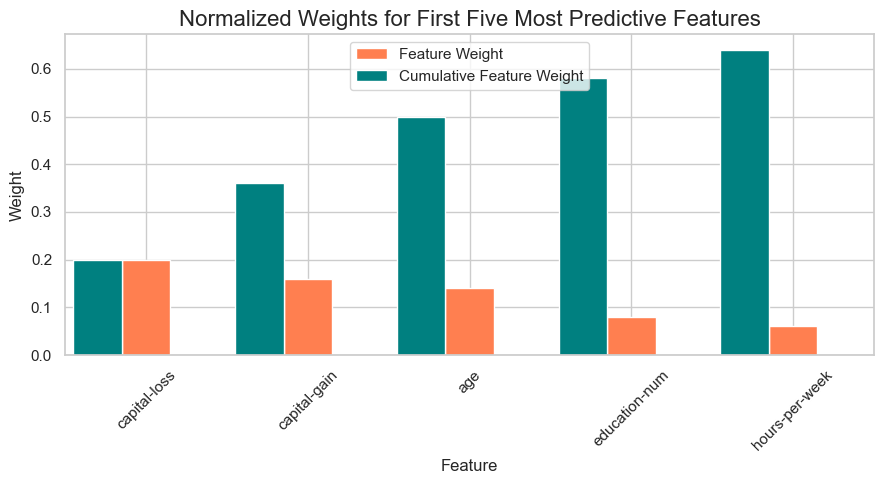

In [116]:
# Import the AdaBoostClassifier, which has the 'feature_importances_' attribute
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoostClassifier on the training data
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# Extract the feature importances from the trained model
importances = model.feature_importances_

# Visualize the feature importances
# First, we sort the importances in descending order
indices = np.argsort(importances)[::-1]
# Next, we get the names of the features corresponding to the importances
columns = X_train.columns.values[indices[:5]]
values = importances[indices][:5]

# Create the plot
fig = plt.figure(figsize=(9, 5))
plt.title("Normalized Weights for First Five Most Predictive Features", fontsize=16)
plt.bar(np.arange(5), values, width=0.3, align="center", color='coral', \
          label="Feature Weight")
plt.bar(np.arange(5) - 0.3, np.cumsum(values), width=0.3, align="center", color='teal', \
            label="Cumulative Feature Weight")
plt.xticks(np.arange(5), columns)
plt.xticks(rotation=45)
plt.xlim((-0.5, 4.5))
plt.ylabel("Weight", fontsize=12)
plt.xlabel("Feature", fontsize=12)

plt.legend(loc='upper center')
plt.tight_layout()
plt.show()



Of the five features predicted earlier, age, hours per week, and education-num, which represents the numerical label for education, are indeed identified as important by Adaboost, albeit with varying rankings.

Interestingly, I overlooked two crucial features: capital-gain and capital-loss, perhaps due to a misunderstanding of their significance. Upon further investigation, I learned that these features represent profits or losses from asset sales, which logically influence one's overall income. Individuals with capital gains are more likely to have higher incomes, while those with capital losses may have lower total earnings.

#### Feature Selection:

A pertinent question arises: how does model performance change when using only a subset of all available features? By reducing the number of features required for training, we can potentially decrease training and prediction times, albeit at the expense of performance metrics. As depicted in the visualization, the top five features contribute over half of the importance among all features. This suggests that we can streamline the feature space and simplify the information necessary for the model to learn.

Let's explore the performance of a model trained solely on these selected features.

In [117]:
# Import the necessary function for cloning a model
from sklearn.base import clone

# Reduce the feature space to the top 5 features
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Clone the best model from the previous grid search and fit it on the reduced data
clf = clone(best_clf)
clf.fit(X_train_reduced, y_train)

# Make predictions using the model trained on reduced data
reduced_predictions = clf.predict(X_test_reduced)

# Report the scores from the final model using both the full data and the reduced data
print("Final Model trained on full data\n------")
print(f"Accuracy on testing data: {accuracy_score(y_test, best_predictions):.4f}")
print(f"F-score on testing data: {fbeta_score(y_test, best_predictions, beta=0.5):.4f}")
print("\nFinal Model trained on reduced data\n------")
print(f"Accuracy on testing data: {accuracy_score(y_test, reduced_predictions):.4f}")
print(f"F-score on testing data: {fbeta_score(y_test, reduced_predictions, beta=0.5):.4f}")

Final Model trained on full data
------
Accuracy on testing data: 0.8701
F-score on testing data: 0.7698

Final Model trained on reduced data
------
Accuracy on testing data: 0.8430
F-score on testing data: 0.7223


#### Effects of Feature Selection

On the reduced dataset, the final model maintains a comparable level of accuracy and F-score compared to the results obtained on the full dataset.

While the accuracy experiences a decrease of approximately 2.7%, the F-score exhibits a reduction of around 5%. Despite these slight declines, the performance of the Adaboost model remains robust.

Given that Adaboost is relatively faster than one of the alternative classifiers we considered, opting for training on the reduced dataset could be advantageous if time constraints are a concern and ample training points are available. However, the decision to prioritize training time over model performance should be made in consideration of the importance of accuracy and F-score. If F-score holds greater significance than accuracy, the larger dip observed in F-score compared to accuracy might influence the final decision.